In [1]:
!pip install kmodes
# pandas, numpy, sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("dataset.csv")

effort_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['time_online', 'video_clicks']])
df['effort'] = effort_clustering.labels_

proactivity_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['content_anticipation', 'delay_lectures']])
df['proactivity'] = proactivity_clustering.labels_

control_clustering = KMeans(n_clusters=2, random_state=0).fit(df[['fraction_spent']])
df['control'] = control_clustering.labels_

df.to_csv("dataset_clustered.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
k_modes = KModes(n_clusters=4)
clusters = k_modes.fit_predict(df[['effort', 'proactivity', 'control']])
df['profile'] = clusters
df.to_csv("dataset_clustered.csv", index=False)

## Part a

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df[["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = features.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10000):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [106]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse_nn_raw = F.mse_loss(y_pred, y_test)
    print(mse_nn_raw.item())

1.0761206150054932


In [107]:
features = df[["effort", "proactivity", "control", "profile"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = features.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10000):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [108]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse_nn_clustered = F.mse_loss(y_pred, y_test)
    print(mse_nn_clustered.item())

0.8698803186416626


## Part b
As it can be seen the MSE of the second approach with was prediction base on the clusters, is lower than the raw values. It shows that the second approach is trained better to predict grades of students base on their clustered features.

## Part c
In this part we use two classical approaches for predicting grades of students the raw and clustered features. The the plot of comparation of the MSEs are can be seen in the last cell.

#### Linear Regression Model

In [109]:
###### Classic LinearRegression Model Training on raw values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
features = df[["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

linearRegress = LinearRegression()
linearRegress.fit(X_train, y_train)
pred_logres = linearRegress.predict(X_test)
y_pred = linearRegress.predict(X_test)
mse_linearRegress_raw = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(mse_linearRegress_raw.item())

1.0487464666366577


In [110]:
###### Classic LinearRegression Model Training on clustered values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
features = df[["effort", "proactivity", "control", "profile"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

linearRegress = LinearRegression()
linearRegress.fit(X_train, y_train)
pred_logres = linearRegress.predict(X_test)
y_pred = linearRegress.predict(X_test)
mse_linearRegress_clustered = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(mse_linearRegress_clustered.item())

0.8824803233146667


#### Decision Tree Model

In [111]:
###### Classic Decision Tree Model Training on raw values
from sklearn import tree
from sklearn.linear_model import LinearRegression
features = df[["time_online", "video_clicks", "content_anticipation", "delay_lectures", "fraction_spent"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)


treeRegress = tree.DecisionTreeRegressor(max_depth = 3)
treeRegress = treeRegress.fit(X_train, y_train)
y_pred = treeRegress.predict(X_test)

mse_treeRegress_raw = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(mse_treeRegress_raw.item())

0.9484816740471974


In [112]:
###### Classic Decision Tree Model Training on clustered values
from sklearn import tree
from sklearn.linear_model import LinearRegression
features = df[["effort", "proactivity", "control", "profile"]].values
target = df['grade'].values

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)


treeRegress = tree.DecisionTreeRegressor(max_depth = 3)
treeRegress = treeRegress.fit(X_train, y_train)
y_pred = treeRegress.predict(X_test)

mse_treeRegress_clustered = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(mse_treeRegress_clustered.item())

0.8684040746751136


#### Comparing Models
In this part we plot MSEs of each models in both raw and clustered values to compare the models.

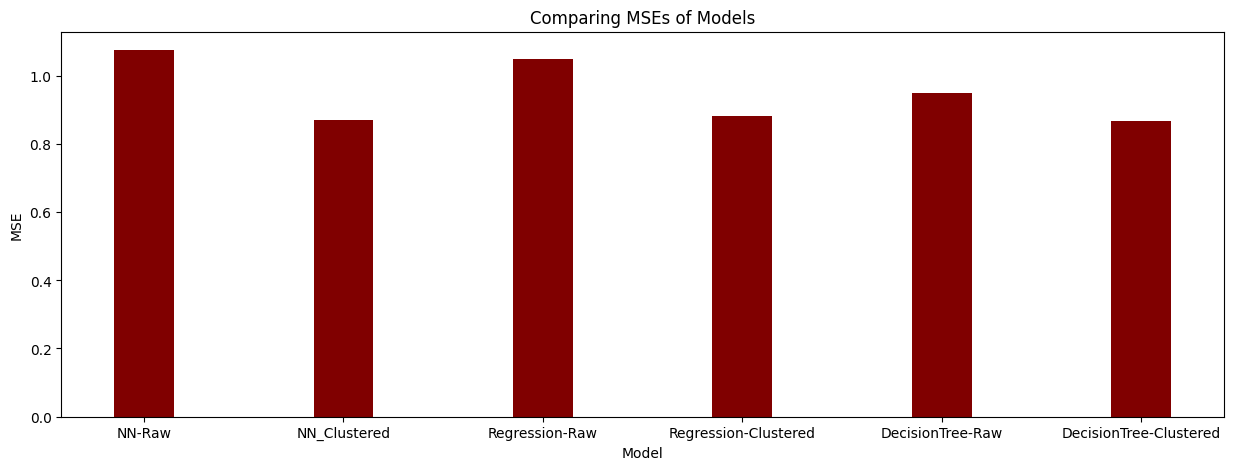

In [121]:
models_name = ["NN-Raw","NN_Clustered","Regression-Raw","Regression-Clustered","DecisionTree-Raw","DecisionTree-Clustered"]
MSEs = [mse_nn_raw, mse_nn_clustered,mse_linearRegress_raw,mse_linearRegress_clustered,mse_treeRegress_raw,mse_treeRegress_clustered]

fig = plt.figure(figsize = (15, 5))

plt.bar(models_name, MSEs, color ='maroon',
        width = 0.3)

plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Comparing MSEs of Models")
plt.show()

As it can be seen, in each model, predicting on clustered values has lower MSE rather than predicting on raw values. It shows that the models, has better accuracy on clustered values.

As it can be seen we trained 3 models and each of them in 2 different set of features. As it can be seen the best model is decision tree on clustered values and the worst model is training with neural networks on raw values.